# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of graded assignment*
- Provide your GitHub URL to the notebook as the submission for the Brightspace assignment page
- Post errors in the course Github's issue page for faster feedback
- ***DO NOT* forget to remove your review partner from your repository before you put the code in Github to avoid plagiarism**

### DEADLINE FOR THIS ASSIGNMENT IS 29 OCTOBER 2021 BEFORE 23:59

<hr />

# Assignment


In the past 7 weeks, you have been working with Google mobility data. Now, let's combine that data with covid-19 data to see if we can derive some *interesting* insights. There are multiple sources of COVID-19 data. Maybe the country that you chose has its separate data source. 
- One such data source is from [OurWorldInData](https://github.com/owid/covid-19-data/tree/master/public/data), which contains daily covid data from 217 countries and the corresponding government response measured as **stringency index**.
- Another data source that provides municipal, provincial, and nationwide covid data for the whole of **Netherlands** is [here](https://github.com/J535D165/CoronaWatchNL).

Feel free to use either of these data sources or something you found on your own!

###  <em> Import libraries </em>

In [108]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import pearsonr
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part I - Data import

1. *[5 points]* Create a new dataframe

This dataframe should combine mobility data and covid-19 data of your chosen country. There are different types of covid data available such as the number of positively tested cases, hospital admission, fatality rates, government stringency index, etc. Provide a brief explanation or data dictionary of your new dataframe. Keep in mind that you need to associate these two datasets, then pick municipal, provincial, or nationwide data accordingly.

 ### <em> Data origin and location </em>

The mobility data (NZ_nation.csv) is from New Zealand and retrieved from Google after which it was processed to only contain the national data. <br>
The Covid-19 data (owid-covid-data.csv) from New Zealand is retrieved from OurWorldInData. This data contains all the countries, but will be filtered in the next step to only contain New Zealand<br>
<br>
The files: 'Final Assignment.ipynb', 'NZ_nation.csv' and 'owid-covid-data.csv' are all placed in the same directory. 


 ### <em>1. Create the new dataframe </em>

In [109]:
# Read the csv file of the mobility data from New Zealand as a dataframe
df_mobi_nz = pd.read_csv('NZ_nation.csv')
df_mobi_nz = df_mobi_nz.iloc[: , 1:]

# Clean the data by dropping columns of the dataframe that will not be used
df_mobi_nz = df_mobi_nz.drop(columns=['country_region_code', 'country_region', 'sub_region_1', 
                                      'sub_region_2','metro_area', 'iso_3166_2_code', 
                                      'census_fips_code', 'place_id'])

# Read the data of New Zealand from the csv file of the Covid-19 data as a dataframe
df_covid = pd.read_csv('owid-covid-data.csv')
df_covid_nz = df_covid[df_covid.loc[:, 'location'] == 'New Zealand']

# Clean the data by dropping columns of the dataframe that will not be used
df_covid_nz = df_covid_nz.drop(columns=['iso_code', 'continent', 'location']) 
    
# Join both dataframes on the column 'date' to one dataframe
df_nz = pd.merge(df_mobi_nz, df_covid_nz, how='outer', on='date')

#### <em> Explanation of the new dataframe 'df_nz' </em>

The dataframe 'df_nz' is made from the mobility data (df_mobi_nz) and the Covid-19 data (df_covid_nz) of New Zealand. <br>
The dataframe of the mobility data 'df_mobi_nz' shows the changes in mobility (in percentages) during 2020/2021. <br>
With this data the impact of Covid-19 on the change in mobility in different places can be analysed and visualised. <br>
The dataframe of the Covid-19 data 'df_covid_nz' shows different parameters on Covid-19, for example:
the total cases, weekly ICU admissions and the stringency index. <br>
With the dataframe 'df_nz', correlation between the changes in and the peaks / valleys of the mobility and Covid-19 data can be analysed and visualised. <br>

## Part II - Data processing

As you already know, there are various peaks/valleys in the changes of mobility activity data. In this assignment, find peaks/valleys (if available) in the covid data.

After identifying peaks from two datasets, you need to check if there are common peaks. Most likely, the peaks do not intersect on the same day, so it should be possible to provide a certain offset to combine peaks/valleys that are close to each other. A visual representation of this problem is shown in the following image:

<p align="center">
  <img src="Images/offset.png" alt="drawing" width="500"/>
</p>


Below are the challenges that need to be solved for this part:

2. *[8 points]* Provide pseudo-code or logic behind the offset algorithms that you will develop for the following questions (3. and 4.) Use bullet points/flow chart/pseudocode/other means to explain the logic.


3. *[10 points]* Find all the common peaks/valleys of mobility activity patterns of a municipality/provinces/nation within a range of time offsets. **eg: find common peaks between 1 activity of two municipalities OR find common peaks between 2 activities of the same municipality**


4. *[2 points]* Find all the common peaks/valleys of the selected covid data of municipality/provinces/nation within a range of time offsets. **eg: find common peaks between 1 type of covid data (eg. vaccinations) of two municipalities OR find common peaks between 2 types of covid data (eg. vaccinations and deaths) of the same municipality**


5. *[8 points]* Relationship between common peaks/valleys (municipal/provincial/nationwide) in activities and covid data (municipal/provincial/nationwide) (time-offset) (either through observation or using programmable logic). If you only use visual observational methods, you won't get maximum points for this question. **eg: compare peaks of 1 activity and 1 type of covid data of the same municipality OR compare common peaks of all activities and common peaks of all types of covid data of the same municipality**

**Motivate your selection for the data choice for finding the common peaks**

### <em> 2. Explanation and pseudo-code of the offset algorithm </em>

#### <em> Algorithm method to find the common peaks and valleys </em>


This algorithm uses the indices of the data since they correspond to the dates of the data. The algorithm start after the indices of the peaks or valleys are found of both activities (question 3) or both types of Covid-19 data (question 4) with the scipy function 'find_peaks'. <br> <br>
Lists are made for the matched indices of the first activity, matched indices of the second activity and the dates. <br>
An offset is set, where the numeric value corresponds to the number of days. <br>
Only the date column from the 'df_nz' dataframe is selected into another dataframe. <br>
Then three if-statements are executed: <br>
<ol>
    <li>For each value (i) in the list of peaks or valleys from the first activity / type of Covid-19 data, and for each value
        (j) in the list of peaks or valleys in the second activity / type of Covid-19 data, if there is a match, then the
        values (i) and (j) are appended to the lists made for the matched indices of the activities / types of Covid-19 data.
        The dates are retrieved from the 'df_nz' dataframe by locating them with the (i) values and then appending them to the
        list of dates. 
    </li> 
    <br>
    <li>For each value (i) - two days in the list of peaks or valleys from the first activity / type of Covid-19 data, and for
        each value (j) in the list of peaks or valleys in the second activity / type of Covid-19 data, if there is a match,
        then the values (i) and (j) are appended to the lists made for the matched indices of the activities / types of Covid
        19 data. The dates are retrieved from the 'df_nz' dataframe by locating them with the (i) - 2 values and then appending
        them to the list of dates. 
    </li> 
    <br>
    <li>For each value (i) + two days in the list of peaks or valleys from the first activity / type of Covid-19 data, and
        for each value (j) in the list of peaks or valleys in the second activity / type of Covid-19 data, if there is a match,
        then the values (i) and (j) are appended to the lists made for the matched indices of the activities / types of Covid
        19 data. The dates are retrieved from the 'df_nz' dataframe by locating them with the (i) + 2 values and then appending
        them to the list of dates. 
    </li> 
    <br>
</ol>
After the execution of the algorithm, with each list of indices, the corresponding values are located in the 'df' dataframe and stored in separate arrays. <br>
Then the three arrays are combined into a dataframe with the dates and the corresponding peaks / valleys.
<br>
<br>
<strong><em> Pseudo-code of the offset algorithm:</em></strong> <br>
<br>
<strong>Input:</strong>
<br>
<ul>
    <li>Indices of peaks or valleys of the first activity / type of Covid-19 data (first_data)</li>
    <li>Indices of peaks or valleys of the second activity / type of Covid-19 data (second_data)</li>
    <li>Dataframe with mobility and Covid-19 data (df_data)</li>
</ul>
<strong>Output:</strong> 
<br> 
<ul>
    <li>List of indices of common peaks or valleys of the first activity / type of Covid-19 data (match_ind)</li> 
    <li>List of indices of common peaks or valleys of the second activity / type of Covid-19 data (match_ind_two)</li>
    <li>List of dates corresponding to the common peaks or valleys of the activities (date_list) </li>
</ul>
<strong>Initialise:</strong> <br>
match_ind &larr; [ ] <br>
match_ind_two &larr; [ ] <br>
date_list &larr; [ ] <br>
df_date &larr; df_data [ date column ] <br>
offset &larr; set value <br>
<br>
<strong>for</strong> i in first_data: <br>
&emsp; <strong>for</strong> j in second_data: <br>
&emsp; &emsp; <strong>if</strong> i == j: <br>
&emsp; &emsp; &emsp; match_ind.<em>add(i) </em> <br>
&emsp; &emsp; &emsp; match_ind_two.<em>add(j) </em> <br>
&emsp; &emsp; &emsp; date_list.<em>add(df_date[i]) </em> <br>
&emsp; &emsp; <strong>elif</strong> i - offset == j: </em> <br>
&emsp; &emsp; &emsp; match_ind.<em>add(i) </em> <br>
&emsp; &emsp; &emsp; match_ind_two.<em>add(j) </em> <br>
&emsp; &emsp; &emsp; date_list.<em>add(df_date[i-offset]) </em> <br>
&emsp; &emsp; <strong>elif</strong> i + offset == j: </em> <br>
&emsp; &emsp; &emsp; match_ind.<em>add(i) </em> <br>
&emsp; &emsp; &emsp; match_ind_two.<em>add(j) </em> <br>
&emsp; &emsp; &emsp; date_list.<em>add(df_date.[i+offset]) </em> <br>

### <em> 3. Common peaks and valleys between two activities in New Zealand </em>

The two activities that are chosen for comparing the common peaks and valleys are 'Retail and recreation' and 'Grocery and pharmacy'. <br>
Data in the columns of these activities shows the change of these activities in percentages compared to baseline. <br>
<br>
I chose these activities because they are closely related. To perform these activities outdoors you need to go to stores. 
Usually different types of stores are located in a shopping centre or area. Therefore, I expect that when one of the two activities shows an peak, the other one might also shows a peak around the same time. <br>

In order not to copy or write the names of the activities everytime, a list was made with the names of the columns of the activities. 

In [110]:
act_list = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 
            'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
            'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'
           ]

#### <em> Find peaks and valleys of the two activities </em>


In [111]:
# INITIALISATION

# Use find_peaks to determine the indices of the peaks of the first activity
peaks_act, _ = find_peaks(df_nz[act_list[0]], height=10, distance=5)

# Use find_peaks to determine the indices of the peaks of the second activity
peaks_act_two, _ = find_peaks(df_nz[act_list[1]], height=10, distance=5)

# Use find_peaks to determine the indices of the valleys of the first activity
valleys_act, _ = find_peaks(-(df_nz[act_list[0]]), height=10, distance=5)

# Use find_peaks to determine the indices of the valleys of the second activity
valleys_act_two, _ = find_peaks(-(df_nz[act_list[1]]), height=10, distance=5)

#### <em> Find the common peaks </em>


In [112]:
# Create empty lists
match_act = []
match_act_two = []
date_list_act = []

# Retrieve only date column from dataframe 'df'
df_date = df_nz['date']

# Set the offset
offset = 2

# Execute the if-statements
for i in peaks_act:
    for j in peaks_act_two:
        if i == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i])
        elif (i - offset) == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i-offset])
        elif (i + offset) == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i+offset])
            
# Convert the lists to arrays        
df_max_act = np.array(df_nz[act_list[0]].iloc[match_act])
df_max_act_two = np.array(df_nz[act_list[1]].iloc[match_act_two])
date_list_act = np.array(date_list_act)

# Make a dataframe from all the arrays
df_max_act_all = pd.DataFrame({'date': date_list_act, act_list[0]: df_max_act, act_list[1]: df_max_act_two})

# Display all common peaks of both activities based on weeks starting on Monday 
df_max_act_all

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,2021-04-01,22.0,40.0
1,2021-04-26,19.0,12.0
2,2021-05-08,22.0,15.0
3,2021-05-15,21.0,11.0
4,2021-05-20,21.0,11.0
5,2021-06-05,23.0,15.0
6,2021-06-10,20.0,11.0
7,2021-06-17,18.0,10.0
8,2021-07-03,22.0,12.0
9,2021-07-10,22.0,13.0


In [113]:
# PLOT THE DATAFRAME

# Plot the dataframe with the common peaks between the two activities
fig = px.scatter(df_max_act_all, x='date', y=[act_list[0], act_list[1]], 
                 title = 'Common peaks between two activities',
                 labels={'date': 'Date', 'value': 'Percentage change', 'variable': 'Type of mobility data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

#### <em> Find the common valleys </em>


In [114]:
# Create empty lists
match_act = []
match_act_two = []
date_list_act = []

# Retrieve only date column from dataframe 'df'
df_date = df_nz['date']

# Set the offset
offset = 2

# Execute the if-statements
for i in valleys_act:
    for j in valleys_act_two:
        if i == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i])
        elif (i - offset) == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i-offset])
        elif (i + offset) == j:
            match_act.append(i)
            match_act_two.append(j)
            date_list_act.append(df_date.iloc[i+offset])
            
# Convert the lists to arrays        
df_min_act = np.array(df_nz[act_list[0]].iloc[match_act])
df_min_act_two = np.array(df_nz[act_list[1]].iloc[match_act_two])
date_list_act = np.array(date_list_act)

# Make a dataframe from all the arrays
df_min_act_all = pd.DataFrame({'date': date_list_act, act_list[0]: df_min_act, act_list[1]: df_min_act_two})

# Display all common valleys of both activities based on weeks starting on Monday 
df_min_act_all

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline
0,2020-03-26,-92.0,-58.0
1,2020-04-10,-95.0,-91.0
2,2020-04-25,-89.0,-53.0
3,2020-05-03,-87.0,-38.0
4,2020-05-25,-29.0,-16.0
5,2020-05-31,-29.0,-13.0
6,2020-06-08,-21.0,-14.0
7,2020-06-24,-16.0,-10.0
8,2020-06-29,-17.0,-13.0
9,2020-08-03,-10.0,-10.0


In [115]:
# PLOT THE DATAFRAME

# Plot the dataframe with the common valleys between the two activities
fig = px.scatter(df_min_act_all, x='date', y=[act_list[0], act_list[1]], 
                 title = 'Common valleys between two activities',
                 labels={'date': 'Date', 'value': 'Percentage change', 'variable': 'Type of mobility data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

### <em> 4. Common peaks and valleys between two types of Covid-19 data in New Zealand </em>

The two types of Covid-19 data that are chosen for comparing the common peaks and valleys are 'New tests' and 'New cases'. <br>
Data in the columns of these types show the numbers of the new tests and the new cases of Covid-19, respectively. <br>

I chose these types of Covid-19 data because I think they could be related.
If there is an sharp increase (peak) in new tests being done, I would expect that there could also be an increase in new cases. 
This of course does depend on how fast the results of the tests are provided and registered.<br>

#### <em> Find peaks and valleys of two types of Covid-19 data </em>


In [116]:
# INITIALISATION

# Set the first type of Covid-19 data
covid_data = 'new_tests'

# Set the second type of Covid-19 data
covid_data_two = 'new_cases'

# Use find_peaks to determine the indices of the peaks of the first type of Covid-19 data
peaks_cov, _ = find_peaks(df_nz[covid_data], height=1000, distance=5)

# Use find_peaks to determine the indices of the peaks of the first type of Covid-19 data
peaks_cov_two, _ = find_peaks(df_nz[covid_data_two], height=10, distance=5)

# Use find_peaks to determine the indices of the valleys of the first type of Covid-19 data
valleys_cov, _ = find_peaks(-(df_nz[covid_data]), height=10, distance=5)

# Use find_peaks to determine the indices of the valleys of the first type of Covid-19 data
valleys_cov_two, _ = find_peaks(-(df_nz[covid_data_two]), height=1, distance=5)

#### <em> Find the common peaks </em>


In [117]:
# Create empty lists
match_cov = []
match_cov_two = []
date_list_cov = []

# Retrieve only date column from dataframe 'df'
df_date = df_nz['date']

# Set the offset
offset = 2

# Execute the if-statements
for i in peaks_cov:
    for j in peaks_cov_two:
        if i == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i])
        elif (i - offset) == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i-offset])
        elif (i + offset) == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i+offset])
            
# Convert the lists to arrays        
df_max_cov = np.array(df_nz[covid_data].iloc[match_cov])
df_max_cov_two = np.array(df_nz[covid_data_two].iloc[match_cov_two])
date_list_cov = np.array(date_list_cov)

# Make a dataframe from all the arrays
df_max_cov_all = pd.DataFrame({'date': date_list_cov, covid_data: df_max_cov, covid_data_two: df_max_cov_two})

# Display all common peaks of both types of Covid-19 data based on weeks starting on Monday 
df_max_cov_all

,date,new_tests,new_cases
0,2020-03-22,2192.0,50.0
1,2020-09-30,6359.0,12.0
2,2021-07-12,15348.0,18.0
3,2021-09-21,19194.0,24.0


In [118]:
# PLOT THE DATAFRAME

# Plot the dataframe with the common peaks between the two types of Covid-19 data
fig = px.scatter(df_max_cov_all, x='date', y=[covid_data, covid_data_two], 
                 title = 'Common peaks between two types of Covid-19 data',
                 labels={'date': 'Date', 'value': 'Quantity', 'variable': 'Type of Covid-19 data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

#### <em>Find the common valleys </em>


In [119]:
# Create empty lists
match_cov = []
match_cov_two = []
date_list_cov = []

# Retrieve only date column from dataframe 'df'
df_date = df_nz['date']

# Set the offset
offset = 2

# Execute the if-statements
for i in valleys_cov:
    for j in valleys_cov_two:
        if i == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i])
        elif (i - offset) == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i-offset])
        elif (i + offset) == j:
            match_cov.append(i)
            match_cov_two.append(j)
            date_list_cov.append(df_date.iloc[i+offset])
            
# Convert the lists to arrays        
df_min_cov = np.array(df_nz[covid_data].iloc[match_cov])
df_min_cov_two = np.array(df_nz[covid_data_two].iloc[match_cov_two])
date_list_cov = np.array(date_list_cov)

# Make a dataframe from all the arrays
df_min_cov_all = pd.DataFrame({'date': date_list_cov, covid_data: df_min_cov, covid_data_two: df_min_cov_two})

# Display all common valleys of both types of Covid-19 data based on weeks starting on Monday 
df_min_cov_all

,date,new_tests,new_cases


In [120]:
# PLOT THE DATAFRAME

# Plot the dataframe with the common valleys between the two types of Covid-19 data
fig = px.scatter(df_min_cov_all, x='date', y=[covid_data, covid_data_two], 
                 title = 'Common valleys between two types of Covid-19 data',
                 labels={'date': 'Date', 'value': 'Quantity', 'variable': 'Type of Covid-19 data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

### <em> 5. Compare peaks of one activity and one type of Covid-data in New Zealand </em>

The activity chosen for comparing the common peaks / valleys is 'Residential' and the type of Covid-19 data is 'New cases'. <br>
Data in the columns of the activity and type of Covid-19 data show the change in residential percentage compared to baseline and the new cases of Covid-19, respectively. <br>

I chose the activity and the type of Covid-19 data because I thought there might be a correlation, since a peak in new cases could result in restrictions, which itself could result in an increase in change in residential percentages compared to baseline. <br>

I used a different method (a built-in method) for the time offset in this question than that of question 3 and 4, since the assignment information said that the offset algorithm only applied to those two questions.

#### <em> Built-in method to find the common peaks / valleys </em>

The built-in method uses the function pandas.Grouper to group dates (and the values corresponding to it) bases on week 
starting at Monday with the use of an offset alias (W-MON). <br>
After the indices of the peaks or valleys are found of both the activity and the type of Covid-19 data with the scipy function 'find_peaks', the values of the activity and type of Covid-19 data and the dates are retrieved from the 'df' dataframe with the use of the indices. <br>
For each activity and type of Covid-19 data the values and the date column are stored in two separate dataframes. <br>
Then, for each of the two newly made dataframes the date column is converted to datetime format. <br>
The data from each of these dataframes are grouped each week starting at Monday. <br> 
The largest value of the activity / type of Covid-19 data is chosen when it concerns peaks, otherwise in the case of valleys the smallest value is chosen. <br>
All the values are stored in a new dataframe. <br>
Hereafter, the NaN values of the newly created dataframe are dropped. <br>
The two dataframes with the grouped values are then merged into one dataframe on the date column resulting in a dataframe
with the common peaks / valleys.

#### <em> Find peaks and valleys of the activity and the type of Covid-19 data </em>


In [121]:
# INITIALISATION

# Set the type of Covid-19 data
covid_data = 'new_cases'

# Use find_peaks to determine the indices of the peaks of the activity
peaks_actcov, _ = find_peaks(df_nz[act_list[5]], height=20, distance=5)

# Use find_peaks to determine the indices of the peaks of the type of Covid-19 data
peaks_actcov_two, _ = find_peaks(df_nz[covid_data], height=10, distance=5)

# Use find_peaks to determine the indices of the valleys of the activity
valleys_actcov, _ = find_peaks(-(df_nz[act_list[5]]), height=1, distance=5)

# Use find_peaks to determine the indices of the valleys of the type of Covid-19 data
valleys_actcov_two, _ = find_peaks(-(df_nz[covid_data]), height=1, distance=5)

#### <em> Find the common peaks </em>


In [122]:
# Assign the data related to the peaks of the activity to a dataframe
df_max_actcov = df_nz[[act_list[5], 'date']].iloc[peaks_actcov]

# Assign the data related to the peaks of the type of Covid-19 data to a dataframe
df_max_actcov_two = df_nz[[covid_data, 'date']].iloc[peaks_actcov_two]

# Group the dates of the activity on weeks starting on Monday and drop all NaN values
df_max_actcov['date'] = pd.to_datetime(df_max_actcov['date'])
df_group_actcov = df_max_actcov.groupby(pd.Grouper(freq='W-MON', key='date'))[act_list[5]].max().to_frame(act_list[5]).reset_index()
df_group_actcov = df_group_actcov.dropna(thresh=2)

# Group the dates of the type of Covid-19 data on weeks starting on Monday and drop all NaN values
df_max_actcov_two['date'] = pd.to_datetime(df_max_actcov_two['date'])
df_group_actcov_two = df_max_actcov_two.groupby(pd.Grouper(freq='W-MON', key='date'))[covid_data].max().to_frame(covid_data).reset_index()
df_group_actcov_two = df_group_actcov_two.dropna(thresh=2)

# Merge both groups of dates with Covid-19 data to find the common peaks
df_merge_max_actcov = pd.merge(df_group_actcov, df_group_actcov_two, on='date')

# Display all common peaks of both types of Covid-19 data based on weeks starting on Monday 
df_merge_max_actcov

,date,residential_percent_change_from_baseline,new_cases
0,2020-03-30,38.0,85.0
1,2020-04-06,37.0,89.0
2,2020-04-13,42.0,44.0
3,2020-04-20,37.0,20.0
4,2021-08-23,38.0,32.0
5,2021-08-30,38.0,84.0


#### <em> Visual analysis of the common peaks </em>


In [123]:
# PLOT THE DATAFRAME

# Plot the dataframe with the common peaks between the activity and the type of Covid-19 data
fig = px.scatter(df_merge_max_actcov, x='date', y=[act_list[5], covid_data], 
                 title = 'Common peaks between an activity and a type of Covid-19 data',
                 labels={'date': 'Date', 'value': 'Percentage change / number of cases',
                         'variable': 'Type of mobility data / type of Covid-19 data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=1.05))

# Show the graph
fig.show()

<em> Analysis: </em> <br>
From the plot above it can be seen that most of the common peaks are concentrated at two periods: one period is at the end of March and throughout April 2020 and the other period is at the end of August 2021. <br>
According to Wikipedia, on 21 March 2020 and on 17 August 2021 New Zealand moved to alert level 4, which corresponds to a lockdown. This explains the increase in residential percentages compared to baseline around the periods. <br>
Although the first lockdown was initiated due to a increase in new cases, which could imply an indirect correlation between new cases and the change in residential percentage: increase in new cases &rarr; lockdown &rarr; increase in change of residential percentage. <br>
However, this was not the case with the second lockdown, since that lockdown was issued due to a specific case of the Delta-variant (according to Wikipedia). A possible explanation for this could be that after the discovery of the case of the Delta-variant, more people were tested, which resulted in an increase in new cases. Then, there is no correlation -direct or indirect- between new cases and the changes in residential percentages compared to baseline. <br>
<br>
Wikipedia source:<br>
https://en.wikipedia.org/wiki/COVID-19_alert_levels_in_New_Zealand

#### <em> Statistical analysis of common peaks </em>


In [124]:
# Calculate the covariance matrix
covariance = np.cov(df_merge_max_actcov[act_list[5]], df_merge_max_actcov[covid_data])
print('The covariance matrix is:')
print()
print(covariance)
print()

# Calculate the Pearson's correlation coefficient
pearson, _ = pearsonr(df_merge_max_actcov[act_list[5]], df_merge_max_actcov[covid_data])
print('The Pearson\'s correlation coefficient is: %.3f' % pearson)

The covariance matrix is:

[[  3.46666667 -10.2       ]
 [-10.2        935.2       ]]

The Pearson's correlation coefficient is: -0.179


<em> Analysis: </em> <br>
The covariance matrix and the Pearson's correlation coefficient are used to measure the linear correlation between two variables. <br>
From the results of the statistical analysis above, it can be concluded that there is no positive direct correlation between the peaks of the new cases and the residential percentage compared to baseline. There is even a small negative direct correlation. <br>
As said before, there might however be a indirect relationship. <br>
That indirect relationship is only causal in the sense that an increase in new cases &rarr; lockdown &rarr; increase in change of residential percentage. <br>
It does not influence the values itself. For example, if there is an increase in new cases with 50 new cases that does not mean that there is an increase <br> with 50 % in change of residential percentage compared to baseline. <br>

#### <em> Find the common valleys </em>


In [125]:
# Assign the data related to the valleys of the activity to a dataframe
df_min_actcov = df_nz[[act_list[5], 'date']].iloc[valleys_actcov]

# Assign the data related to the valleys of the type of Covid-19 data to a dataframe
df_min_actcov_two = df_nz[[covid_data, 'date']].iloc[valleys_actcov_two]

# Group the dates of the activity on weeks starting on Monday and drop all NaN values
df_min_actcov['date'] = pd.to_datetime(df_min_actcov['date'])
df_group_actcov = df_min_actcov.groupby(pd.Grouper(freq='W-MON', key='date'))[act_list[5]].min().to_frame(act_list[5]).reset_index()
df_group_actcov = df_group_actcov.dropna(thresh=2)

# Group the dates of the type of Covid-19 data on weeks starting on Monday and drop all NaN values
df_min_actcov_two['date'] = pd.to_datetime(df_min_actcov_two['date'])
df_group_actcov_two = df_min_actcov_two.groupby(pd.Grouper(freq='W-MON', key='date'))[covid_data].min().to_frame(covid_data).reset_index()
df_group_actcov_two = df_group_actcov_two.dropna(thresh=2)

# Merge both groups of dates with Covid-19 data to find the common valleys
df_merge_min_actcov = pd.merge(df_group_actcov, df_group_actcov_two, on='date')

# Display all common valleys of both types of Covid-19 data based on weeks starting on Monday 
df_merge_min_actcov

,date,residential_percent_change_from_baseline,new_cases


In [126]:
# PLOT THE DATAFRAME

# Plot the dataframe  with the common valleys between the activity and the type of Covid-19 data
fig = px.scatter(df_merge_min_actcov, x='date', y=[act_list[5], covid_data], 
                 title = 'Common valleys between an activity and a type of Covid-19 data',
                 labels={'date': 'Date', 'value': 'Percentage change / number of cases', 
                         'variable': 'Type of mobility data / type of Covid-19 data'})

# Move the location of the legend to the upper right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=1.05))

# Show the graph
fig.show()

<em> Analysis: </em> <br>
Since no common valleys were found, no further analysis was performed.

## Part III - Data visualisation

6. *[12 points]* Use visualization to tell the mobility and covid data story of a specific municipality/province/nationwide. This is a more exploration question. Explain the logic behind your story and also your visualization choices

### <em> 6. Compare New Zealand and Australia </em>

I chose to visualise the mobility and (several parameters of) the Covid-19 data of New Zealand and Australia, in order to compare the two countries. With this comparison the difference between mobility trends and the Covid-19 effects and response can be seen and analysed.

#### <em> Prepare the data from Australia </em>

Although the data from New Zealand is ready for use, the data of Australia also needs to be prepared and made ready for use. <br> 
The data of the mobility reports of Australia ('2020_AU_Region_Mobility_Report.csv', '2021_AU_Region_Mobility_Report.csv') were retrieved from Google and stored in the folder with the assignment and the other data from New Zealand. The Covid-19 of Australia was retrieved from the same file of OurWorldInData as that of New Zealand (owid-covid-data.csv).

In [127]:
# Read the 2020 and 2021 Google mobility data of Australia as dataframes
df_2020 = pd.read_csv('2020_AU_Region_Mobility_Report.csv')  
df_2021 = pd.read_csv('2021_AU_Region_Mobility_Report.csv')

# Combine the two dataframes into one
df_aus = pd.concat([df_2020,df_2021]).reset_index(drop=True)

# Select only the country data of Australia
df_mobi_aus = df_aus[df_aus['sub_region_1'].isna() & df_aus['sub_region_2'].isna()]

# Clean the data by dropping columns of the dataframe that will not be used
df_mobi_aus = df_mobi_aus.drop(columns=['country_region_code', 'country_region', 'sub_region_1', 
                                        'sub_region_2','metro_area', 'iso_3166_2_code',
                                        'census_fips_code', 'place_id'])

# Select only the Australian Covid-19 data from the OurWorldInData file 
df_covid_aus = df_covid[df_covid.loc[:, 'location'] == 'Australia']

# Clean the data by dropping columns of the dataframe that will not be used
df_covid_aus = df_covid_aus.drop(columns=['iso_code', 'continent', 'location'])

#### <em> Comparison of mobility data between New Zealand and Australia </em>

In order to compare both dataframes, visually but also statistically, both dataframes need to cover the same time period.
Therefore a two if-statements are made to test which dataframe is shorter and then the other dataframe is transformed to a dataframe with the same length. Since the dates are in chronological order, the same length of dataframes also results in a same time period.

In [128]:
if len(df_mobi_nz) < len(df_mobi_aus):
    df_mobi_aus = df_mobi_aus.iloc[0:len(df_mobi_nz)]
elif len(df_mobi_nz) > len(df_mobi_aus):
    df_mobi_nz = df_mobi_nz.iloc[0:len(df_mobi_aus)]      

<em> All types of mobility data of New Zealand</em>

In [129]:
# Transform the dataframe into a structure that can better be read by plotly.express
nz_names = [nz for nz in df_mobi_nz.columns if nz != 'date']
df_nz_melt = df_mobi_nz.melt(id_vars=['date'], var_name='name', value_vars=nz_names)

# Plot the dataframe with the different types of mobility data
fig = px.line(df_nz_melt, 'date', 'value', color='name', symbol='name', 
              title = 'Mobility data of New Zealand during 2020/2021',
              labels={'date': 'Date', 'value': 'Percentage change', 'name': 'Type of mobility data'})

# Move the location of the legend to the lower right corner
fig.update_layout(legend=dict(yanchor='top', y=1.5, xanchor='right', x=0.99))

# Show the graph
fig.show()

<em> Pearson's correlation coefficient - New Zealand </em>

Text(0.5, 1.0, "Pearson's correlation coefficient - New Zealand")

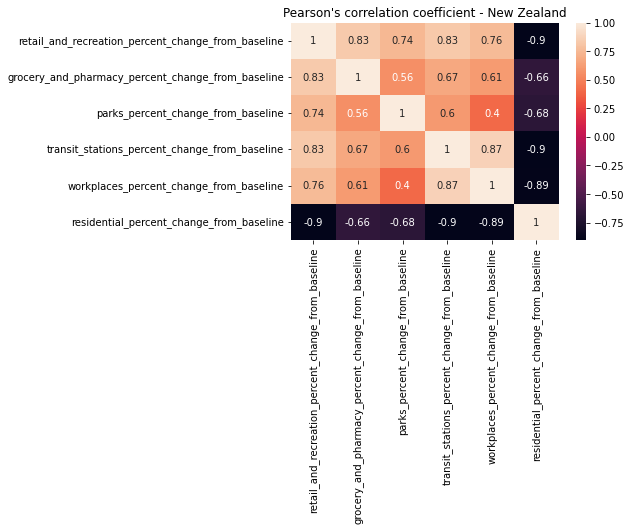

In [130]:
# Make a separate dataframe to exlude the date column in order to perform the computation
df_mobi_nz_pear = df_mobi_nz.iloc[: , 1:]

# Compute the Pearson's correlation coefficient
df_mobi_nz_hm = df_mobi_nz_pear.corr(method='pearson')

# Make a heatmap to display the results
sns.heatmap(df_mobi_nz_hm, annot=True)
plt.title('Pearson\'s correlation coefficient - New Zealand')

<em> Analysis: </em> <br>
From the heatmap above, several strong correlations can be seen. <br>
Between the 'Residential' activity and and the three activities: 'Retail and recreation', 'Public transport', 'Workplaces'  there is a strong negative correlation. When the three activities, that are outdoor, decrease, 'Residential' which is indoor, increases. <br>
Between 'Retail and recreation' and the two activities: 'Grocery and pharmacy' and 'Public transport' there is a strong positive correlation. When people go shopping in retail stores, they often also shop for groceries and might use public transport to get to the stores. <br>
Between 'Workplaces' and 'Public transport' there is a strong correlation. When people go to work, they often use the public transport.


<em> All types of mobility data of Australia</em>

In [131]:
# Transform the dataframe into a structure that can better be read by plotly.express
aus_names = [aus for aus in df_mobi_aus.columns if aus != 'date']
df_aus_melt = df_mobi_aus.melt(id_vars=['date'], var_name='name', value_vars=aus_names)

# Plot the dataframe with the different types of mobility data
fig = px.line(df_aus_melt, 'date', 'value', color='name', symbol='name', title = 'Mobility data of Australia during 2020/2021',
              labels={'date': 'Date', 'value': 'Percentage change', 'name': 'Type of mobility data'})

# Move the location of the legend to the lower right corner
fig.update_layout(legend=dict(yanchor='top', y=1.5, xanchor='right', x=0.99))

# Show the graph
fig.show()

<em> Pearson's correlation coefficient - Australia </em>

Text(0.5, 1.0, "Pearson's correlation coefficient - Australia")

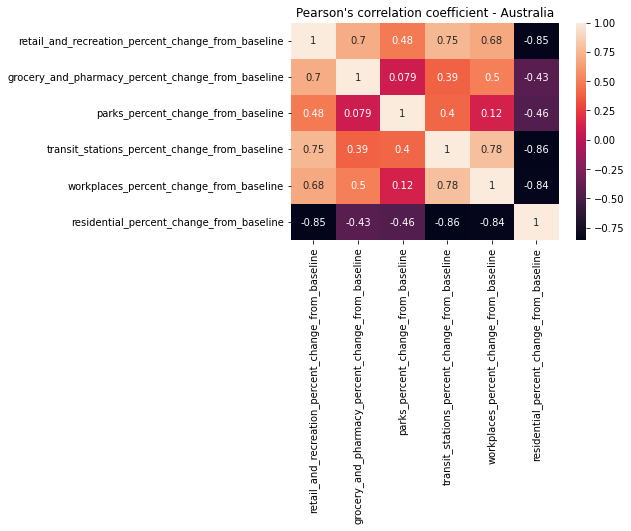

In [132]:
# Make a separate dataframe to exlude the date column in order to perform the computation
df_mobi_aus_srcc = df_mobi_aus.iloc[: , 1:]

# Compute the Pearson's correlation coefficient
df_mobi_aus_hm = df_mobi_aus_srcc.corr(method='pearson')

# Make a heatmap to display the results
sns.heatmap(df_mobi_aus_hm, annot=True)
plt.title('Pearson\'s correlation coefficient - Australia')

<em> Analysis: </em> <br>
From the heatmap above, several strong correlations can be seen. <br>
Between the 'Residential' activity and the three activities: 'Retail and recreation', 'Public transport', 'Workplaces' there is a strong negative correlation. When the three activities, that are outdoor, decrease, 'Residential' which is indoor, increases. <br> 
Between 'Workplaces' and 'Public transport' there is a strong correlation. When people go to work, they often use the public transport.


<em> Same types of mobility data for New Zealand and Australia </em>

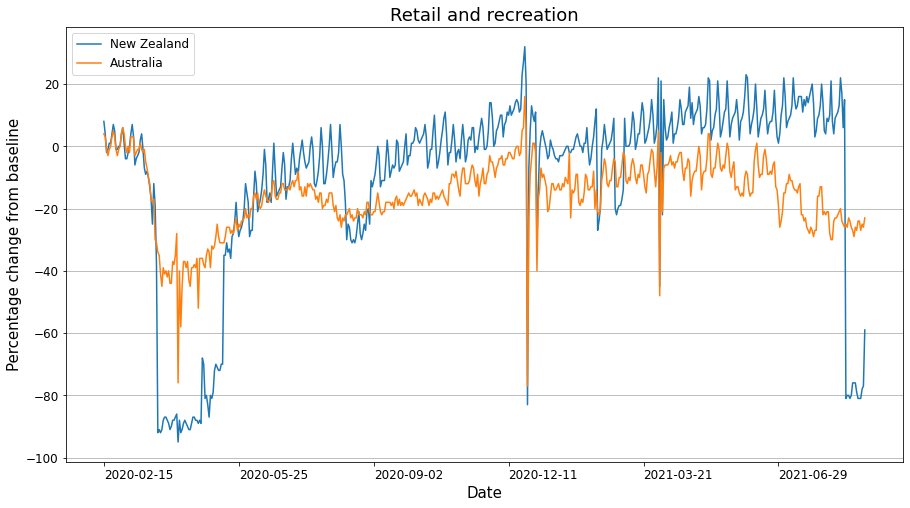

In [133]:
# RETAIL AND RECREATION
# Plot the 'Retail and recreation' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y = act_list[0], label='New Zealand',
                     figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y = act_list[0], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Retail and recreation', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(loc=2, prop={'size': 12})


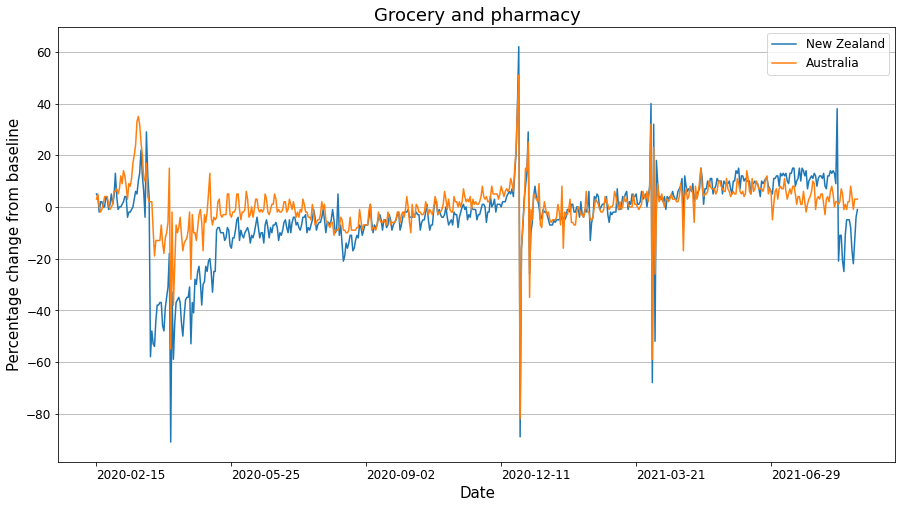

In [134]:
# GROCERY AND PHARMACY
# Plot the 'Grocery and pharmacy' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y = act_list[1], label='New Zealand',
                     figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y = act_list[1], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Grocery and pharmacy', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(prop={'size': 12})

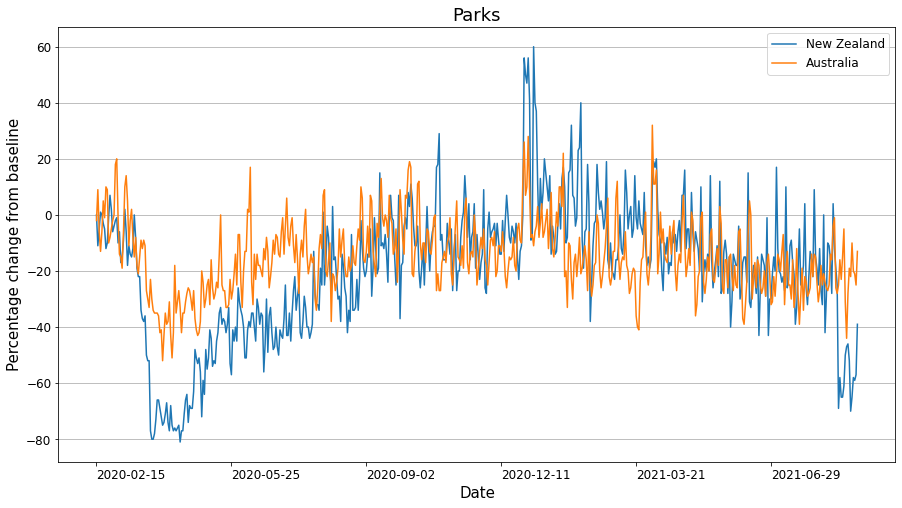

In [135]:
# PARKS
# Plot the 'Parks' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y =act_list[2], label='New Zealand', figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y =act_list[2], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Parks', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(prop={'size': 12})


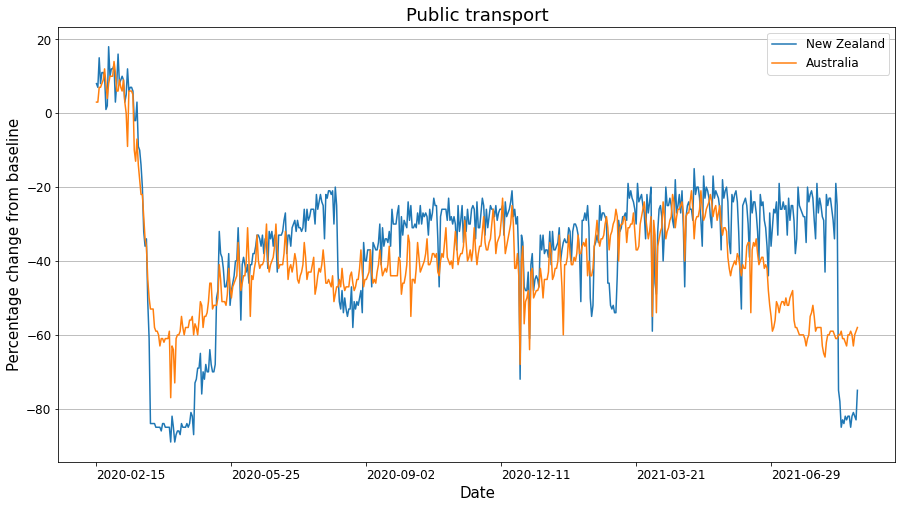

In [136]:
# PUBLIC TRANSPORT
# Plot the 'Public transport' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y =act_list[3], label='New Zealand', figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y =act_list[3], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Public transport', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(prop={'size': 12})


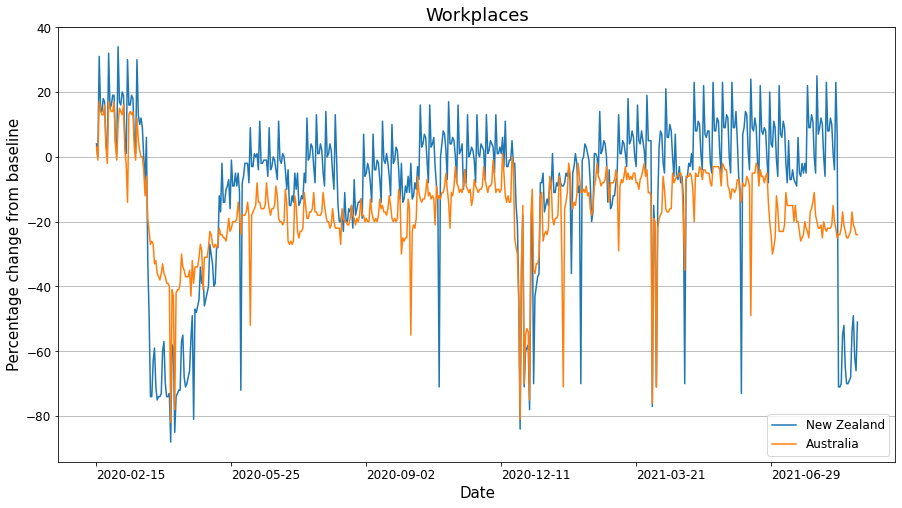

In [137]:
# WORKPLACES
# Plot the 'Workplaces' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y =act_list[4], label='New Zealand', figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y =act_list[4], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Workplaces', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(loc=4, prop={'size': 12})


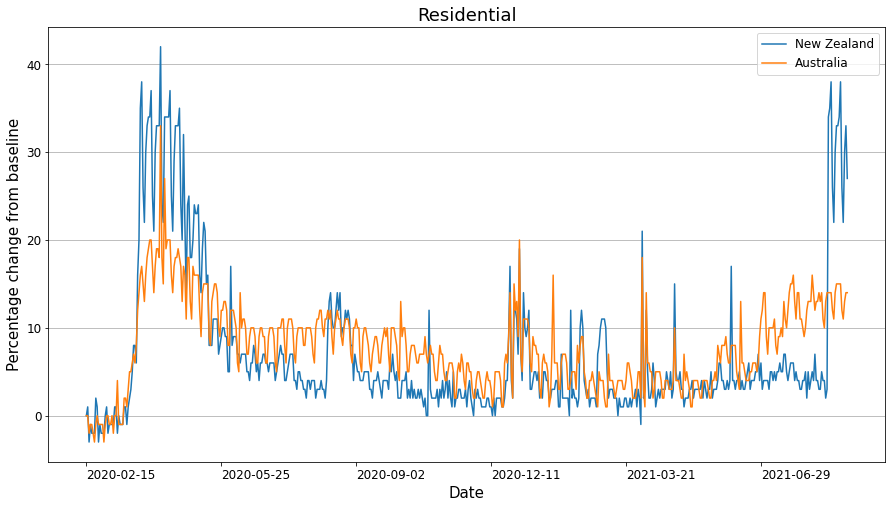

In [138]:
# RESIDENTIAL
# Plot the 'Residential' percentage change of New Zealand and Australia
ax = df_mobi_nz.plot(x = 'date', y =act_list[5], label='New Zealand', figsize=([15,8])) 
df_mobi_aus.plot(x = 'date', y =act_list[5], label='Australia', ax=ax)

# Set the title and labels of x and y-axis
plt.title('Residential', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Percentage change from baseline', fontsize=15)

# Set the ticks of the x and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the x-ticks to the left
plt.setp(ax.xaxis.get_majorticklabels(), ha='left' )

# Set a grid
plt.grid(b=True, which='major', axis='y')

# Change the size and location of the legend
plt.legend(prop={'size': 12})

<em> Pearson's correlation coefficient - Same types of mobility data of New Zealand and Australia </em>

In [139]:
# Calculate the Pearson's correlation coefficient
pear = []
for i in act_list:
    pearson, _ = pearsonr(df_mobi_nz[i], df_mobi_aus[i])
    pear.append(pearson)

# Convert the list with activities and the list with the Spearman's coefficients to a dataframe
df_stat = pd.DataFrame({'Activity':act_list, 'Pearson\'s correlation coefficient':pear})

# Display the dataframe
df_stat


,Activity,Pearson's correlation coefficient
0,retail_and_recreation_percent_change_from_base...,0.764589
1,grocery_and_pharmacy_percent_change_from_baseline,0.758653
2,parks_percent_change_from_baseline,0.488620
3,transit_stations_percent_change_from_baseline,0.721324
4,workplaces_percent_change_from_baseline,0.677701
5,residential_percent_change_from_baseline,0.752879


<em> Analysis: </em> <br>
The highest values of the Pearson's correlation coefficient can be seen with the activities: 'Retail and recreation', 'Grocery and pharmacy', 'Public transport', and 'Residential'. <br>
This implies that when the percentage of change increased or decreased with these activities in New Zealand, this also largely happened in Australia. <br>
Although an increase or decrease in percentage of change in activity in New Zealand does not cause a increase or decrease in percentage of change in activity in Australia, it does imply that in both countries people act the same way, resulting in the same mobility trends with regards to these activities. <br>
With the other activities this correlation was a lot weaker. <br>


#### <em> Comparison of Covid-19 data between New Zealand and Australia </em>

In order to compare both dataframes, visually but also statistically, both dataframes need to cover the same time period.
Therefore, two if-statements are made to test which dataframe is shorter and then the other dataframe is transformed to a dataframe with the same length. Since the dates are in chronological order, the same length of dataframes also results in a same time period.

In [140]:
if len(df_covid_nz) < len(df_covid_aus):
    df_covid_aus = df_covid_aus.iloc[0:len(df_covid_nz)]
elif len(df_covid_nz) > len(df_covid_aus):
    df_covid_nz = df_covid_nz.iloc[0:len(df_covid_aus)]

In order not to copy or write the names of the types of Covid-19 data everytime, a list was made with the names of the columns of the types of Covid-19 data that was to be visualised. 

In [141]:
cov_list = ['total_cases_per_million', 'total_deaths_per_million', 'stringency_index']

In [145]:
# NEW ZEALAND
# Select the date column and the first parameter of the cov_list into a new dataframe
df_cov_nz_one = df_covid_nz[['date', cov_list[0]]]

# Change the name of the first parameter of the cov_list
df_cov_nz_one.rename({cov_list[0]: 'New Zealand'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
nz_names_one = [nz for nz in df_cov_nz_one.columns if nz != 'date']
nz_melt_one = df_cov_nz_one.melt(id_vars=['date'], var_name='name', value_vars=nz_names_one)

# AUSTRALIA
# Select the date column and the first parameter of the cov_list into a new dataframe
df_cov_aus_one = df_covid_aus[['date', cov_list[0]]]

# Change the name of the first parameter of the cov_list
df_cov_aus_one.rename({cov_list[0]: 'Australia'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
aus_names_one = [aus for aus in df_cov_aus_one.columns if aus != 'date']
aus_melt_one = df_cov_aus_one.melt(id_vars=['date'], var_name='name', value_vars=aus_names_one)

# MERGE THE TWO DATAFRAMES INTO ONE
df_nz_aus_one= pd.concat([nz_melt_one, aus_melt_one])

# PLOT THE DATAFRAME
# Plot the dataframe with the different types of mobility data
fig = px.line(df_nz_aus_one, 'date', 'value', color='name', symbol='name', 
              title = 'Total cases per million inhabitants',
              labels={'date': 'Date', 'value': 'Number of cases per million inhabitants', 'name': 'Country'})

# Move the location of the legend to the lower right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

In [146]:
# NEW ZEALAND
# Select the date column and the second parameter of the cov_list into a new dataframe
df_cov_nz_two = df_covid_nz[['date', cov_list[1]]]

# Change the name of the second parameter of the cov_list
df_cov_nz_two.rename({cov_list[1]: 'New Zealand'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
nz_names_two = [nz for nz in df_cov_nz_two.columns if nz != 'date']
nz_melt_two = df_cov_nz_two.melt(id_vars=['date'], var_name='name', value_vars=nz_names_two)

# AUSTRALIA
# Select the date column and the second parameter of the cov_list into a new dataframe
df_cov_aus_two = df_covid_aus[['date', cov_list[1]]]

# Change the name of the second parameter of the cov_list
df_cov_aus_two.rename({cov_list[1]: 'Australia'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
aus_names_two = [aus for aus in df_cov_aus_two.columns if aus != 'date']
aus_melt_two = df_cov_aus_two.melt(id_vars=['date'], var_name='name', value_vars=aus_names_two)

# MERGE THE TWO DATAFRAMES INTO ONE
df_nz_aus_two= pd.concat([nz_melt_two, aus_melt_two])

# PLOT THE DATAFRAME
# Plot the dataframe with the different types of mobility data
fig = px.line(df_nz_aus_two, 'date', 'value', color='name', symbol='name', 
              title = 'Total deaths per millions inhabitants',
              labels={'date': 'Date', 'value': 'Number of deaths per million inhabitants', 'name': 'Country'})

# Move the location of the legend to the lower right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

In [147]:
# NEW ZEALAND
# Select the date column and the third parameter of the cov_list into a new dataframe
df_cov_nz_three = df_covid_nz[['date', cov_list[2]]]

# Change the name of the third parameter of the cov_list
df_cov_nz_three.rename({cov_list[2]: 'New Zealand'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
nz_names_three = [nz for nz in df_cov_nz_three.columns if nz != 'date']
nz_melt_three = df_cov_nz_three.melt(id_vars=['date'], var_name='name', value_vars=nz_names_three)

# AUSTRALIA
# Select the date column and the first parameter of the cov_list into a new dataframe
df_cov_aus_three = df_covid_aus[['date', cov_list[2]]]

# Change the name of the third parameter of the cov_list
df_cov_aus_three.rename({cov_list[2]: 'Australia'},
                     axis=1, inplace=True)

# Transform the dataframe into a structure that can better be read by plotly.express
aus_names_three = [aus for aus in df_cov_aus_three.columns if aus != 'date']
aus_melt_three = df_cov_aus_three.melt(id_vars=['date'], var_name='name', value_vars=aus_names_three)

# MERGE THE TWO DATAFRAMES INTO ONE
df_nz_aus_three= pd.concat([nz_melt_three, aus_melt_three])

# PLOT THE DATAFRAME
# Plot the dataframe with the different types of mobility data
fig = px.line(df_nz_aus_three, 'date', 'value', color='name', symbol='name', 
              title = 'Stringency index',
              labels={'date': 'Date', 'value': '-', 'name': 'Country'})


# Move the location of the legend to the lower right corner
fig.update_layout(legend=dict(yanchor='top', y=1.25, xanchor='right', x=0.99))

# Show the graph
fig.show()

<em> Analysis: </em><br>
From the three graphs above the difference between New Zealand and Australia with regards to these Covid-19 parameters are visualised.<br>
It can be seen that in the beginning New Zealand and Australia has a similar number of cases and deaths per million inhabitants. <br> 
However after July 2020, the number of cases and deaths per million rose sharply in Australia, prompting more restrictions which resulted in a higher Stringency Index. <br> 
From October 2020 till August 2021 the number of cases and deaths per million rose a little for New Zealand and was relatively steady for Australia. <br> 
After August 2021 the number of cases and deaths per million rose sharply in Australia, resulting in a higher Stringency Index. Although the number of cases per million in New Zealand also went up, the number of deaths per million did not increase as much. This might explain why the Stringency Index only went up a little.

<em> Comparison of stringency indici of New Zealand and Australia </em> <br>

A comparison was visualised of the stringency indici of New Zealand and Australia. <br>
The total cases per million inhabitants was set as the x values and the total deaths per million inhabitants was set as the y-value. <br>
With this visualisation the correlation (if there is any) can be seen between stricter government policy with regards to Corona restrictions, total cases and total deaths in New Zealand and Australia. <br>
The data of New Zealand and Australia will both be grouped on weeks starting on Monday in order to make the animation of the visualisation run better and make it more clear.

In [148]:
# NEW ZEALAND
# Group the dates of the Covid-19 data of New Zealand on weeks starting on Monday and drop all NaN values
df_covid_nz['date'] = pd.to_datetime(df_covid_nz['date'])
df_cov_nz_zero  = df_covid_nz.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[0]].min().to_frame(cov_list[0]).reset_index()
df_cov_nz_one  = df_covid_nz.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[1]].min().to_frame(cov_list[1]).reset_index()
df_cov_nz_two  = df_covid_nz.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[2]].min().to_frame(cov_list[2]).reset_index()

# Merge the grouped data into one dataframe
df_cov_nz_gro = pd.merge(df_cov_nz_zero, df_cov_nz_one, on='date')
df_cov_nz_gro = pd.merge(df_cov_nz_gro, df_cov_nz_two, on='date')

# Assign a new column with the value of the country 'New Zealand'
df_cov_nz_gro = df_cov_nz_gro.assign(country = 'New Zealand')

# Fill in all NaN values with zero
df_cov_nz_gro[cov_list[1]] = df_cov_nz_gro[cov_list[1]].fillna(0)

# Change the value of one cell with NaN to specific value 
# Since it is only one day, I thought I could fill in the value with that of the day before or after (this was the same value)
# The one missing value of Stringency Index occurred only in the dataset of New Zealand
df_cov_nz_gro[cov_list[2]] = df_cov_nz_gro[cov_list[2]].fillna(81.02)

# AUSTRALIA
# Group the dates of the Covid-19 data of Australia on weeks starting on Monday and drop all NaN values
df_covid_aus['date'] = pd.to_datetime(df_covid_aus['date'])
df_cov_aus_zero  = df_covid_aus.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[0]].min().to_frame(cov_list[0]).reset_index()
df_cov_aus_one  = df_covid_aus.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[1]].min().to_frame(cov_list[1]).reset_index()
df_cov_aus_two  = df_covid_aus.groupby(pd.Grouper(freq='W-MON', key='date'))[cov_list[2]].min().to_frame(cov_list[2]).reset_index()

# Merge the grouped data into one dataframe
df_cov_aus_gro = pd.merge(df_cov_aus_zero, df_cov_aus_one, on='date')
df_cov_aus_gro = pd.merge(df_cov_aus_gro, df_cov_aus_two, on='date')

# Assign a new column with the value of the country 'Australia'
df_cov_aus_gro = df_cov_aus_gro.assign(country = 'Australia')

# Fill in all NaN values with zero
df_cov_aus_gro[cov_list[1]] = df_cov_aus_gro[cov_list[1]].fillna(0)

# MERGE THE TWO DATAFRAMES INTO ONE
# Concatenate both dataframes into one dataframe
df_nz_aus= pd.concat([df_cov_nz_gro, df_cov_aus_gro])
df_nz_aus['date'] = df_nz_aus['date'].astype(str)

In [149]:
# Plot the dataframe with the stringency index, total cases per million inhabitants, total deaths per million inhabitants 
# of New Zealand and Australia
fig = px.scatter(df_nz_aus, x=cov_list[0], y=cov_list[1], animation_frame='date', 
                 animation_group='country', size=cov_list[2], color='country', hover_name='country', size_max=50, 
                 range_x=[-200,3600], range_y=[-10,50], title = 'Stringency index of New Zealand and Australia',
                 labels={cov_list[0]: 'Total cases per million inhabitants', 
                         cov_list[1]:'Total deaths per million inhabitants', 
                         'country': 'Country'})
# Show the graph
fig.show()

<em> Analysis: </em> <br>
The above graph shows an animation of the change in total cases and deaths per millions and the Stringency Index (SI) as the circle as a function of the date. <br>
While the governments usually look at (an increase in) new cases to increase the restrictions, I think that the total cases and deaths per million might also be interesting to visualise and analyse to see if there is a correlation. <br>
In the beginning (week starting at 2020-03-23) both countries have about the same SI. <br>
Then, till the week starting at 2020-05-18 the SI of New Zealand was higher than Australia even though both countries has comparable number of cases and deaths per million. <br>
Hereafter, the SI of New Zealand decreased a lot, while that of Australia first decreased a bit and then increased a lot. The number of cases and deaths per million in Australia also increased strongly. <br>
From the week starting 2020-08-24 till the week starting at 2020-09-21, the SI of New Zealand increased after which it decreased a bit. <br>
From the week starting at 2020-08-10 till the week starting at 2020-09-21, the SI of Australia stayed the same. And even though there was not a sharp increase of number of cases per million, there was however a very sharp increase in number of deaths per million. <br>
Hereafter, during the week starting at 2020-09-21 till the week starting at 2021-08-16, the SI's of New Zealand and Australia increased and decreased bit. <br>
Then, in the week starting at 2021-08-23 the SI of New Zealand increased very sharp and became higher than that of Australia, even though Australia had a larger number of total cases and deaths per million. The increase in SI of New Zealand might have to do with a new case of the Delta variant that occurred the week before on 17 August 2020 (Wikipedia source:
https://en.wikipedia.org/wiki/COVID-19_alert_levels_in_New_Zealand). <br>
From the week starting at 2021-08-23, the SI of New Zealand stayed the same for two weeks, after which (from the week starting at 2021-09-13) it decreased a bit and stayed the same till the week starting at 2021-11-01 (the end of the data). The number of cases per million did increase during this time period, but the number of deaths per million increased only a little. <br>
For Australia, after the week starting at 2021-08-23 till the week starting at 2021-11-01 (the end of the data), the SI stayed the same, although the number of cases per million did increase a lot, faster than that of New Zealand, and the number of deaths per million increased a bit. <br>

# Rubrics

## Overall grading

- 10% of the final grade is for code review for the final assignment. Information about partners will be released after the assignment submission deadline.

- 90% of the final grade is divided among the following categories, which vary for different questions (see image below):
    - narrative
    - coding/logic - correctness
    - readability - [pep8 standard](https://www.python.org/dev/peps/pep-0008/)

<p align="center">
  <img src="Images/rubric.png" alt="drawing" width="500"/>
</p>

## Rubrics for each question in the assignment

Criteria:
1. Consistent dataset throughout the assignment, combined dataframe
2. Correctness, generalisability, clarity, simplicity
3. Working code, visualization of the result, generalisability
4. Generalisability
5. Logic, visualization
6. Logic, story, visuals, clarity, correctness, readability

You can obtain maximum points for the question if you have:
- Excellent stories
- Interactive visualisation 
- Programmable logic in *question 5*

You can obtain bonus points if you use:
- Extra datasets (eg: population)